<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Alphas/Retail_Crypto_Universe_Return_by_Ticker_Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

18:48:34 Starting...
18:48:34 Installing yfinance into Google notebook...
18:48:42 Installing arch into Google notebook...
18:48:54 Initialized.


In [2]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=list(map(lambda x:x.replace("-USD",""),data.columns.droplevel(1)))
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
display(data)

Return (%),AAVE,ADA,ARB,AVAX,BCH,BONK,BTC,COMP,DOGE,ETC,...,PNUT,POPCAT,SHIB,SOL,TRUMP,UNI,WIF,XLM,XRP,XTZ
UTC Date,,,,,,,,,,,,,,,,,,,,,
2024-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-08,NaN,NaN,NaN,NaN,NaN,NaN,1.448534,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-09,NaN,NaN,NaN,NaN,NaN,NaN,2.348370,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-10,NaN,NaN,NaN,NaN,NaN,NaN,-0.402624,NaN,0.477437,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-11,NaN,NaN,NaN,NaN,2.013289,NaN,-0.655153,NaN,-1.226744,-1.542857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-18,4.467709,2.314781,5.042404,3.867112,3.498362,11.756720,3.149721,5.187419,8.580249,3.171661,...,18.223749,11.850659,5.813953,4.351120,4.621688,7.068841,14.355821,2.078920,3.157799,3.876386
2025-05-19,6.443445,-2.295334,-0.762880,-3.389058,-3.282590,-4.154519,-0.764352,-4.829850,-3.724915,-0.944054,...,-2.975321,-9.171970,-2.830503,-3.682969,-2.749390,-3.154751,-6.883488,-2.010943,-1.993209,-3.281587
2025-05-20,5.026192,0.477961,0.433240,1.575605,0.326137,1.571610,1.162133,-0.429612,0.733036,-0.567034,...,-5.438056,3.969475,0.137080,1.077644,11.987591,1.558737,-1.797992,0.319066,-0.983279,1.492341


18:49:00 Wrote figure to 'Cumulative Return for Retail Cryptocurrency Sample.png'.


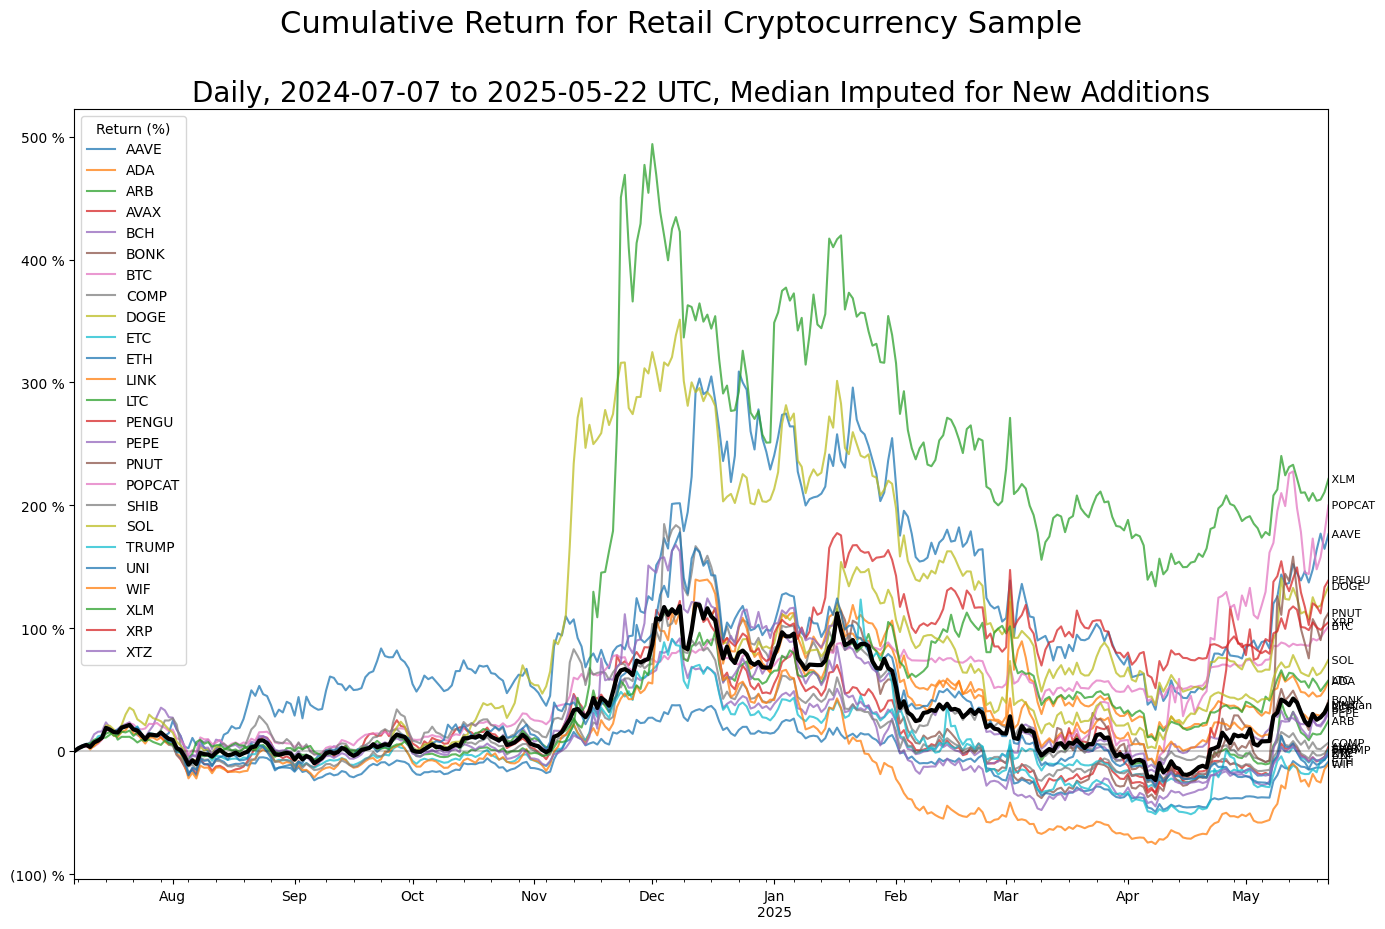

In [3]:
factor=(one+data/hundred)

for k,v in sorted(zip((s:=factor.apply(lambda x:x.first_valid_index()-1)).values,s.index),key=lambda x:x[0]):
    factor.loc[k,v]=m if not np.isnan(m:=factor.cumprod().loc[k].median()) else one

factor=factor.cumprod()*hundred-hundred
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
factor.plot(ax=plot,alpha=0.75)
factor['Median']=factor.median(axis=1)
factor['Median'].plot(ax=plot,color='black',linewidth=3)

plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Cumulative Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC, Median Imputed for New Additions" % (factor.index[0],factor.index[-1]),fontsize=20)

for c in factor:
    plot.text(x:=factor.index[-1],y:=factor.loc[x,c]," "+c,fontsize=8,ha='left',va='center')

figure.savefig(filename:=title+(filetype:='.png'),dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

18:49:03 Rank Correlation for 'Useful' Coins: SignificanceResult(statistic=np.float64(-0.5617647058823529), pvalue=np.float64(0.023537016474280824))


,Median,Mean,Std.Dev.,Sample,Std.Err.,t Statistic,p Value,Significance,Symbol Rank,Meme Coin
Return (%),,,,,,,,,,
AAVE,0.478249,0.804224,5.333535,70,0.637479,1.261569,0.207104,,1,0.0
ADA,0.138190,0.281934,4.179142,70,0.499503,0.564428,0.572463,,2,0.0
ARB,0.502190,0.479240,5.737320,70,0.685741,0.698864,0.484637,,3,0.0
AVAX,0.237914,0.558018,4.879918,70,0.583262,0.956720,0.338709,,4,0.0
BCH,0.176515,0.501914,4.070154,70,0.486477,1.031733,0.302197,,5,0.0
BTC,0.234828,0.491479,2.437191,70,0.291300,1.687191,0.091567,,7,0.0
COMP,-0.107097,0.251099,4.112691,70,0.491561,0.510820,0.609477,,8,0.0
ETC,-0.118930,0.206333,3.643035,70,0.435426,0.473864,0.635597,,10,0.0
ETH,0.015556,0.617336,4.679633,70,0.559323,1.103719,0.269715,,11,0.0


18:49:03
OLS Regression for 'Useful' Coins
                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     7.321
Date:                Thu, 22 May 2025   Prob (F-statistic):             0.0171
Time:                        18:49:03   Log-Likelihood:                 6.4419
No. Observations:                  16   AIC:                            -8.884
Df Residuals:                      14   BIC:                            -7.339
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const  

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


,Median,Mean,Std.Dev.,Sample,Std.Err.,t Statistic,p Value,Significance,Symbol Rank,Meme Coin,Linear Model
Return (%),,,,,,,,,,,
AAVE,0.478249,0.804224,5.333535,70,0.637479,1.261569,0.207104,,1,0.0,0.582493
ADA,0.138190,0.281934,4.179142,70,0.499503,0.564428,0.572463,,2,0.0,0.557115
ARB,0.502190,0.479240,5.737320,70,0.685741,0.698864,0.484637,,3,0.0,0.531737
AVAX,0.237914,0.558018,4.879918,70,0.583262,0.956720,0.338709,,4,0.0,0.506358
BCH,0.176515,0.501914,4.070154,70,0.486477,1.031733,0.302197,,5,0.0,0.480980
BONK,0.210342,1.381248,7.956495,70,0.950983,1.452443,0.146379,,6,1.0,NaN
BTC,0.234828,0.491479,2.437191,70,0.291300,1.687191,0.091567,,7,0.0,0.455602
COMP,-0.107097,0.251099,4.112691,70,0.491561,0.510820,0.609477,,8,0.0,0.430223
DOGE,0.066216,0.680506,5.241496,70,0.626479,1.086241,0.277373,,9,1.0,NaN


18:49:05 Wrote figure to 'Mean Return for Retail Cryptocurrency Sample.png'.


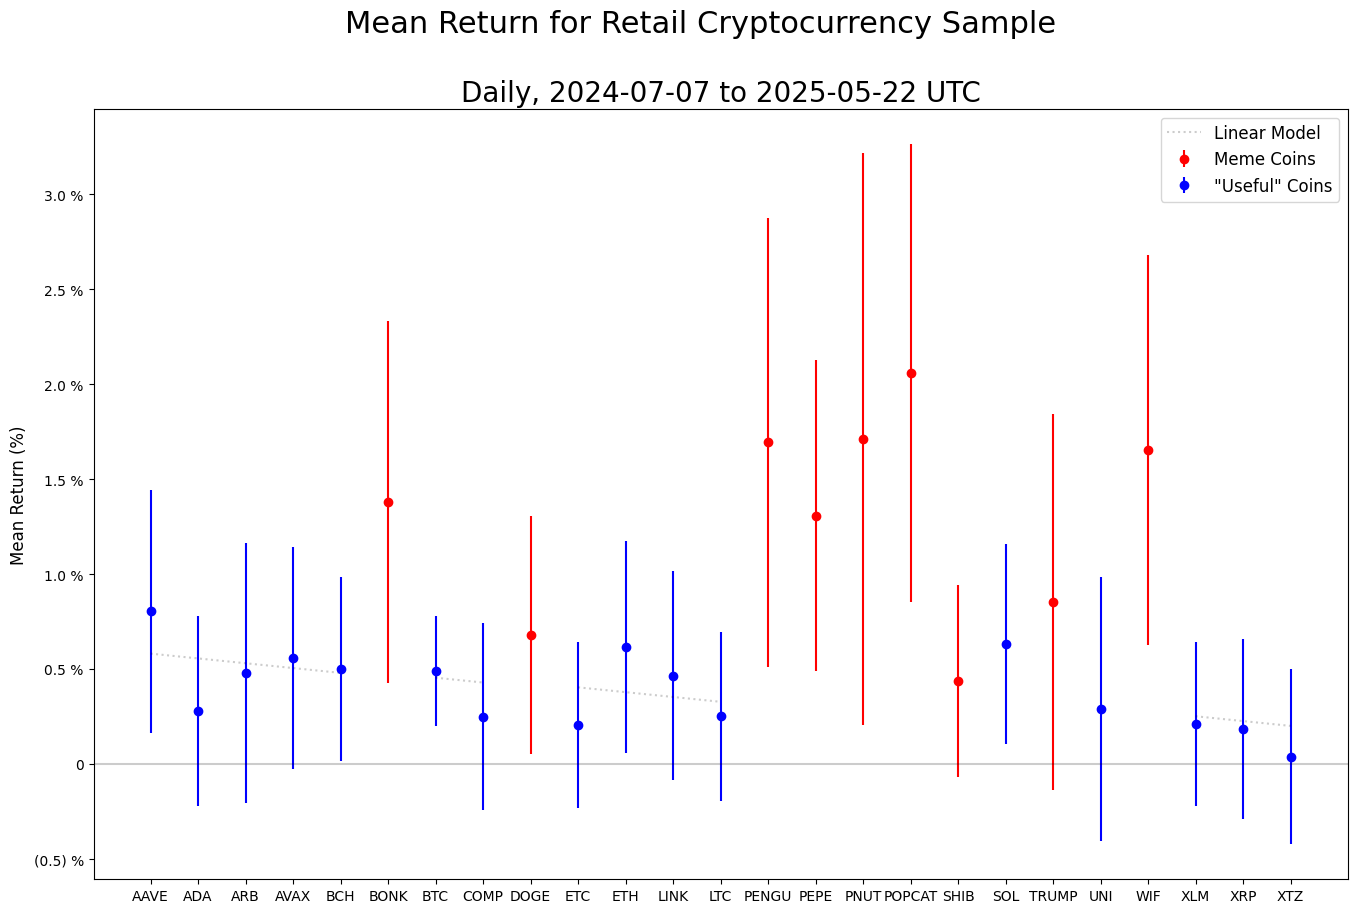

In [4]:
from scipy.stats import spearmanr,norm
from statsmodels.api import OLS
from statsmodels.tools import add_constant

report=pd.DataFrame({
    "Median":(design:=data.dropna(axis=0).sort_index()).median(), # sort index not needed, but let's do it anyway
    "Mean":(m:=design.mean()),
    "Std.Dev.":design.std(),
    "Sample":design.count(),
    "Std.Err.":(e:=design.std()/np.sqrt(design.count())),
    "t Statistic":(z:=m/e),
    "p Value":(p:=z.apply(lambda x:two*min([norm.cdf(x),norm.sf(x)]))),
    "Significance":p.apply(lambda x:"***" if x<=0.001 else "**" if x<=0.01 else "*" if x<0.05 else ""),
    "Symbol Rank":list(range(1,m.index.shape[0]+1)),
    "Meme Coin":[one if t in "BONK,DOGE,PENGU,PEPE,PNUT,POPCAT,SHIB,TRUMP,WIF" else zero for t in m.index]
})

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=report.index,y:=report["Mean"],alpha=0,label=None)
plot.errorbar(x:=report[report["Meme Coin"]==one].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Red",label='Meme Coins')
plot.errorbar(x:=report[report["Meme Coin"]==zero].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Blue",label='"Useful" Coins')
nprint("Rank Correlation for 'Useful' Coins:",spearmanr(x,y))

design=report.loc[u:=x];display(design)
design["Symbol Rank"]=list(range(1,design.index.shape[0]+1))
fit=OLS(y:=design["Mean"],add_constant(x:=design["Symbol Rank"])).fit()
nprint("OLS Regression for 'Useful' Coins",fit.summary(),sep="\n")
report.loc[design.index,"Linear Model"]=fit.predict()
display(report)

plot.plot(x:=report.index,y:=report["Linear Model"],':',color='black',alpha=0.2,label="Linear Model")
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Mean Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC" % (data[u].index[0],data[u].index[-1]),fontsize=20)
plot.yaxis.set_major_formatter(PercentLabels(1))
plot.set_ylabel("Mean Return (%)",fontsize=12)
plot.legend(fontsize=12)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

In [10]:
from warnings import catch_warnings,simplefilter

design=data[report[report["Meme Coin"]==zero].index].dropna()
results=pd.DataFrame(index=design.columns)
nprint("Fitting AR(1)-AGARCH(1,1) Model with GED Innovations for %s to %s UTC..." % (design.index[0],design.index[-1]))

for ticker in tqdm(design.columns):
    model=ARX(design[ticker],lags=[1])
    model.volatility = GARCH2(1,0,1)
    model.distribution = GeneralizedError2()

    with catch_warnings():
        simplefilter("ignore")
        ged_model=model.fit(update_freq=0,disp='Off',options={'maxiter':1000})

        if ged_model.convergence_flag==0:
            for field in "Estimate","Std.Err.":
                results.loc[ticker,"Drift,%s" % field]=(g:=ged_model.params if field=="Estimate" else ged_model.std_err)["Const"]
                results.loc[ticker,"Return,%s" % field]=g[ticker+"[1]"]
                results.loc[ticker,"C,%s" % field]=g["omega"]
                results.loc[ticker,"A,%s" % field]=g["alpha[1]"]
                results.loc[ticker,"B,%s" % field]=g["beta[1]"]
                results.loc[ticker,"nu,%s" % field]=g["nu"]

            results.loc[ticker,"variance,Estimate"]=results.loc[ticker,"C,Estimate"]/(one-results.loc[ticker,"B,Estimate"]-results.loc[ticker,"B,Estimate"])

results.columns=pd.MultiIndex.from_tuples(list(map(lambda x:tuple(x.split(",")),results.columns)))
spearman=pd.DataFrame(index=(lambda x:dict.fromkeys(x).keys())(results.columns.get_level_values(0)))
results.sort_index(axis=1,inplace=True)
display(results)

nprint("Analysis of correlation with ticker ranks...")

for estimator in spearman.index:
    spearman.loc[estimator,"Rank Correlation"]=(R:=spearmanr(x:=results.index,y:=results.xs("Estimate",axis=1,level=1)[estimator])).statistic
    spearman.loc[estimator,"Sample"]=(n:=len(x))
    spearman.loc[estimator,"t Statistic"]=R.statistic*((n-two)/(one-R.statistic**two))**half
    spearman.loc[estimator,"p Value"]=R.pvalue

spearman["Significance"]=spearman["p Value"].apply(lambda x:"***" if x<=0.001 else "**" if x<=0.01 else "*" if x<0.05 else "")
display(spearman.sort_values("Rank Correlation",ascending=False))

nprint("Most significant result:",(p:=spearman["p Value"].min()),"by chance",one-(one-p)**(n:=spearman.shape[0]),"in a sample of",n)

18:53:34 Fitting AR(1)-AGARCH(1,1) Model with GED Innovations for 2025-03-05 to 2025-05-22 UTC...


  0%|          | 0/16 [00:00<?, ?it/s]

A                           B                        C  \
            Estimate      Std.Err.      Estimate      Std.Err.   Estimate   
Return (%)                                                                  
AAVE        0.002954  6.758234e-02  4.926432e-01  1.600890e+00  13.600514   
ADA         0.109981  1.353104e-01  6.319008e-01  1.690392e-01   4.945765   
ARB         0.119442  1.012887e-01  6.276492e-01  8.820274e-02   8.095651   
AVAX       -0.152168  2.059108e-11  1.119599e+00  1.452602e-10   1.397765   
BCH         0.089070  1.207446e-01  6.026487e-01  8.856501e-02   5.512779   
BTC        -0.131340  7.434862e-08  1.115464e+00  6.370121e-07   0.243110   
COMP        0.046487  8.748253e-02  7.479510e-01  1.011586e-01   3.559961   
ETC         0.090867  6.353379e-02  3.308503e-01  3.229559e-01   8.386126   
ETH         0.510775  4.688064e-01  1.793456e-18  4.135783e-01  15.737727   
LINK       -0.128484  4.001057e-14  1.113572e+00  3.687816e-12   0.755963   
LTC         0.044956  1.067599e-01  6.120010e-01  1.327138e-01   4.847107   
SOL         0.045166  1.181963e-01  8.120884e-01  1.692524e-01   2.723254   
UNI         0.138319  1.143948e-01  5.663236e-01  2.978467e-01  10.687527   
XLM         0.090530  1.078081e-01  5.491391e-01  9.869406e-02   4.912891   
XRP         0.185786  1.850400e-01  6.045513e-01  1.266508e-01   4.057312   
XTZ         0.069152  1.054821e-01  5.790003e-01  2.521910e-01   5.719033   

                             Drift              Return                  nu  \
                Std.Err.  Estimate  Std.Err.  Estimate  Std.Err.  Estimate   
Return (%)                                                                   
AAVE        4.743996e+01 -0.010068  0.880661 -0.156045  0.146663  1.265868   
ADA         3.246244e+00 -0.281353  0.571858 -0.194503  0.207839  1.079030   
ARB         4.323349e+00  0.402872  0.000163  0.035059  0.000032  0.954474   
AVAX        6.918027e-07 -0.312107  0.000500  0.012308  0.000896  2.368698   
BCH         1.946661e+00  0.118079  0.004923 -0.071242  0.000776  1.161368   
BTC         1.336724e-04  0.182471  0.034564 -0.064251  0.140175  1.862768   
COMP        2.010944e+00 -0.144654  0.519971 -0.040006  0.173622  1.316716   
ETC         5.236505e+00 -0.259729  0.000314 -0.112330  0.000613  1.056061   
ETH         1.038604e+01  0.088997  0.000077 -0.191946  0.000307  0.642272   
LINK        4.200636e-04 -0.210884  0.000453 -0.098270  0.000269  2.365437   
LTC         2.439385e+00  0.068979  0.305083 -0.169053  0.050437  1.100105   
SOL         3.172468e+00  0.120146  0.954879 -0.054835  0.275442  1.204467   
UNI         1.150745e+01 -0.535654  0.000365 -0.079825  0.000156  0.717774   
XLM         2.391920e+00 -0.010023  0.423026 -0.085860  0.150441  1.412751   
XRP         2.413285e+00 -0.121609  0.000026  0.068550  0.000034  0.866185   
XTZ         4.936489e+00  0.436281  0.000305  0.037092  0.000052  1.005822   

                        variance  
            Std.Err.    Estimate  
Return (%)                        
AAVE        0.360381  924.354419  
ADA         0.480190  -18.748044  
ARB         0.208426  -31.710533  
AVAX        0.000520   -1.127959  
BCH         0.287158  -26.852656  
BTC         0.736858   -0.197502  
COMP        0.313322   -7.178759  
ETC         0.217600   24.789070  
ETH         0.144793   15.737727  
LINK        0.000059   -0.616034  
LTC         0.248808  -21.638673  
SOL         0.410784   -4.362954  
UNI         0.169513  -80.571125  
XLM         0.256170  -49.989643  
XRP         0.196719  -19.403446  
XTZ         0.234212  -36.196269

18:53:37 Analysis of correlation with ticker ranks...


,Rank Correlation,Sample,t Statistic,p Value,Significance
Return,0.288235,16.0,1.126277,0.278984,
A,0.250000,16.0,0.966092,0.350391,
Drift,0.129412,16.0,0.488321,0.632882,
C,-0.091176,16.0,-0.342578,0.737005,
B,-0.208824,16.0,-0.798961,0.437659,
nu,-0.276471,16.0,-1.076414,0.299942,
variance,-0.458824,16.0,-1.932141,0.073836,


18:53:37 Most significant result: 0.07383553449548107 by chance 0.4154565483629 in a sample of 7
